In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob

%matplotlib inline

# Data

Source: https://www.kaggle.com/jacksoncrow/stock-market-dataset

In [62]:
astypes = {'Volume': np.int64 }
float32s = { t : np.float32 for t in {'Open', 'High', 'Low', 'Close','Adj Close'}}
astypes.update(float32s)

In [60]:
%%time

DATADIR = 'stock-market-dataset/stocks'

full = list()

for i, f in enumerate(glob.glob(f'{DATADIR}/*.csv')):
    
    print(i, f)    
    df = pd.read_csv(f, parse_dates=['Date'], low_memory=False)
    
    symbolname = f[len(DATADIR)+1:-4]
    
    df['Symbol'] = symbolname
    df = df.set_index('Symbol')
    
    full.append(df)
    
full_stocks = pd.concat(full).dropna()
full_stocks = full_stocks.astype(astypes)

full_stocks.to_csv('DATA.csv', encoding='ascii')

0 stock-market-dataset/stocks\A.csv
1 stock-market-dataset/stocks\AA.csv
2 stock-market-dataset/stocks\AACG.csv
3 stock-market-dataset/stocks\AAL.csv
4 stock-market-dataset/stocks\AAMC.csv
5 stock-market-dataset/stocks\AAME.csv
6 stock-market-dataset/stocks\AAN.csv
7 stock-market-dataset/stocks\AAOI.csv
8 stock-market-dataset/stocks\AAON.csv
9 stock-market-dataset/stocks\AAP.csv
10 stock-market-dataset/stocks\AAPL.csv
11 stock-market-dataset/stocks\AAT.csv
12 stock-market-dataset/stocks\AAU.csv
13 stock-market-dataset/stocks\AAWW.csv
14 stock-market-dataset/stocks\AAXN.csv
15 stock-market-dataset/stocks\AB.csv
16 stock-market-dataset/stocks\ABB.csv
17 stock-market-dataset/stocks\ABBV.csv
18 stock-market-dataset/stocks\ABC.csv
19 stock-market-dataset/stocks\ABCB.csv
20 stock-market-dataset/stocks\ABEO.csv
21 stock-market-dataset/stocks\ABEV.csv
22 stock-market-dataset/stocks\ABG.csv
23 stock-market-dataset/stocks\ABIO.csv
24 stock-market-dataset/stocks\ABM.csv
25 stock-market-dataset/st

TypeError: to_csv() got an unexpected keyword argument 'enc'

# Work in Progress

In [63]:
%%time

df = pd.read_csv("DATA.csv", parse_dates=['Date'], low_memory=False, dtype=float32s)

Wall time: 25.5 s


In [73]:
df.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,A,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,A,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,A,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,A,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,A,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [69]:
Y = df.resample('Y', on='Date')

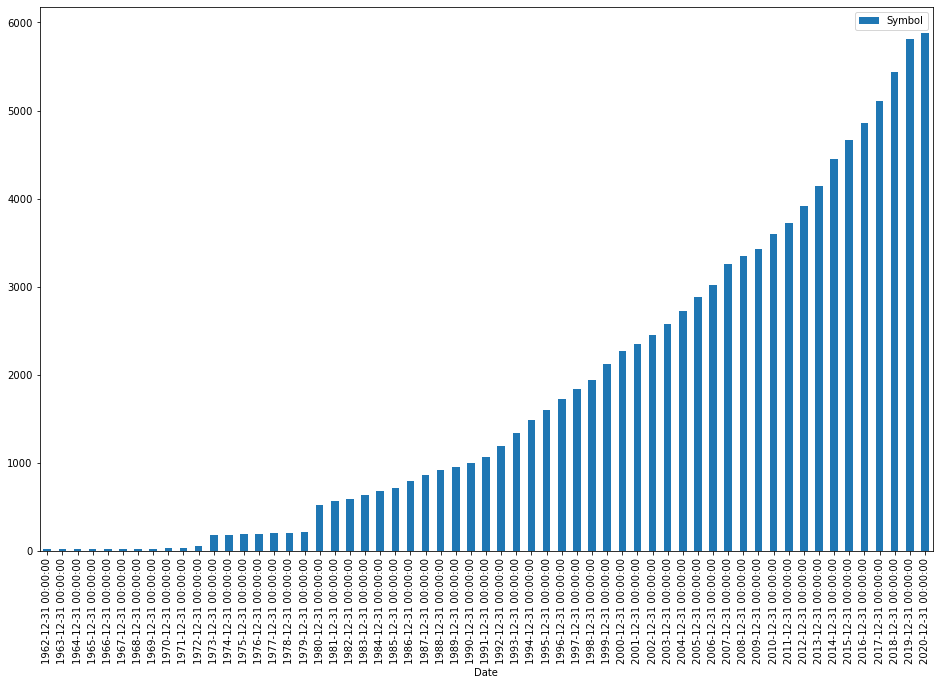

In [70]:
uniqs_per_year = Y.agg({'Symbol': 'nunique'})

uniqs_per_year.plot.bar(figsize=(16,10))

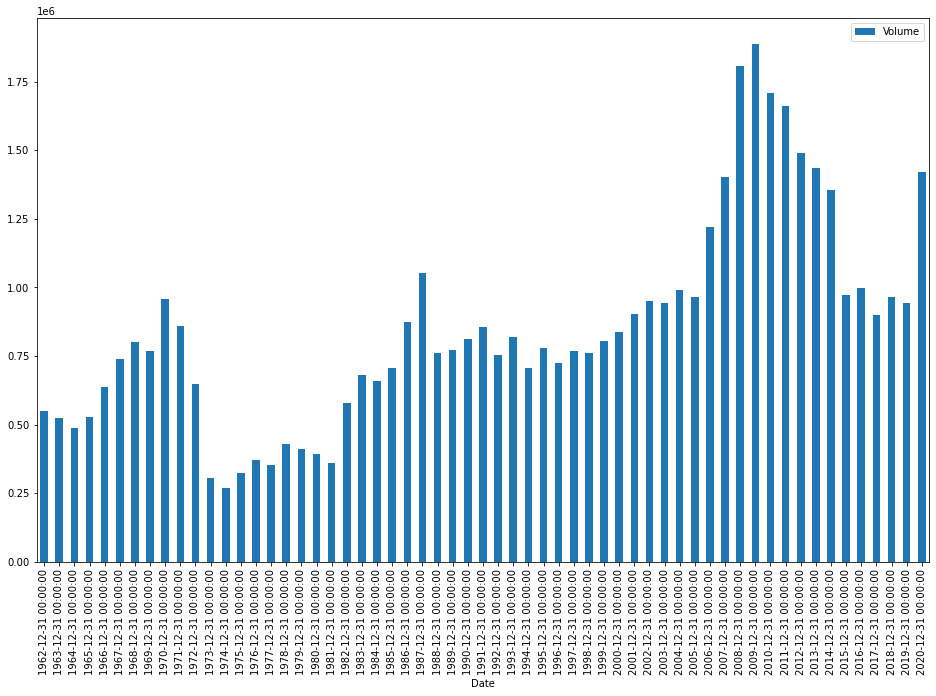

In [72]:
average_volume_per_year = Y.agg({'Volume': 'mean'})

average_volume_per_year.plot.bar(figsize=(16,10))

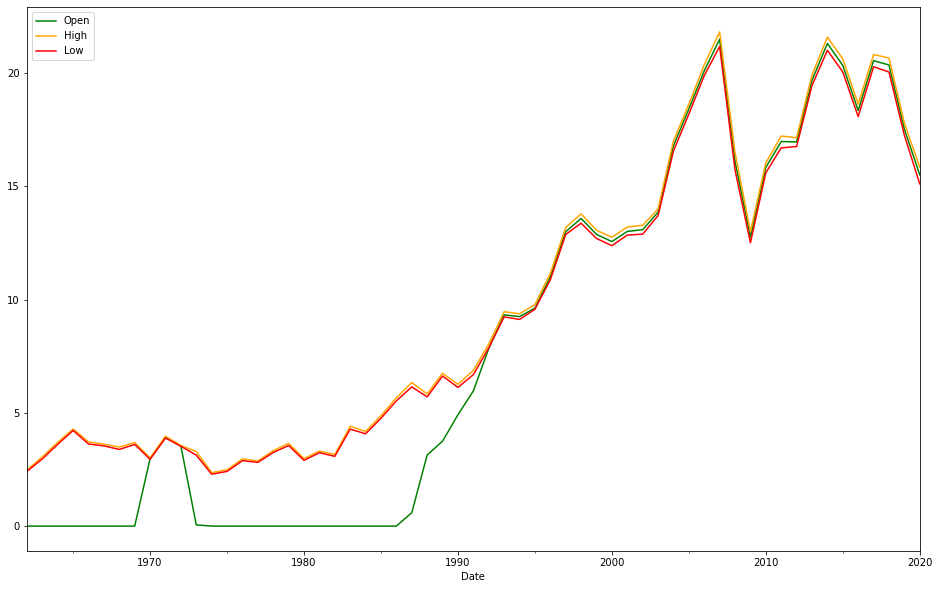

In [95]:
average_max_min_delta_per_year = Y[['Open', 'High', 'Low']].agg({'Open': 'median', 'High': 'median', 'Low': 'median'})

# why are the MEDIAN YEARLY opens categorically so low for the years 1962-1968 and 1974-1986?

# thoughts: 
# - the median for all possible stocks doesn't HAVE to be between the median for the highs and lows;
#  especially if there are not very many stocks or much of the year the stock values are 0?
#   - but why would the open be 0 for any stock at any time?

average_max_min_delta_per_year.plot(color=['green', 'orange', 'red'], figsize=(16,10))